In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
subprocess.check_output(["make"])

b'g++ main.cpp -o main.x -std=c++14\n'

Starting position:  6.829989158549706 1.8300359981020466 7.0712245290150495
Wind speed:  1  m/s


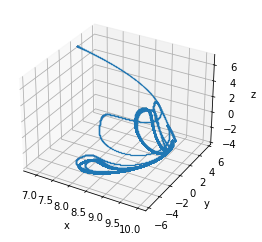

Starting position:  6.8299928186080425 1.8300223381200695 7.0712245290150495
Wind speed:  5  m/s


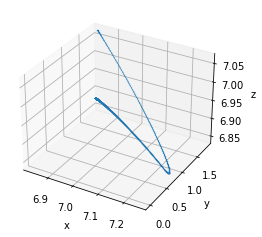

Starting position:  6.829998798285274 1.8299726980689426 7.071231599922605
Wind speed:  10  m/s


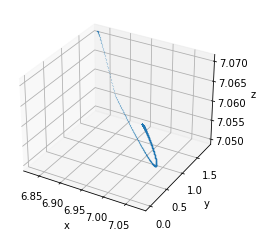

Starting position:  6.8300377151039635 1.8298001176395031 7.071238670823089
Wind speed:  20  m/s


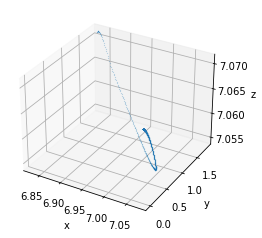

Starting position:  6.830094069320115 1.8295077656284238 7.071259883482115
Wind speed:  30  m/s


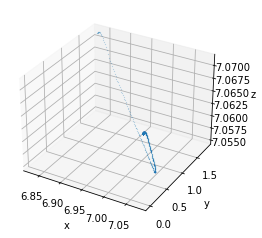

In [21]:
windspeeds=[1, 5, 10, 20, 30] #m/s
for windspeed in windspeeds:
    fig=plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    theta=[]
    phi=[]
    r=[]
    position_list=subprocess.check_output(["./main.x", "%d"%windspeed]).decode() #simulating for 10 minutes, step=0.01
    position_list=position_list.split("\n")
    for line in position_list[:-1]:
        line=line.split(' ')
        theta.append(float(line[4]))
        phi.append(float(line[5]))
        r.append(float(line[6]))
    theta=np.array(theta)
    phi=np.array(phi)
    r=np.array(r)
    x=np.multiply(r, np.multiply(np.sin(theta), np.cos(phi)))
    y=np.multiply(r, np.multiply(np.sin(theta), np.sin(phi)))
    z=np.multiply(r, np.cos(theta))
    print("Starting position: ",x[0], y[0], z[0])
    ax.plot(x, y, z, 'o', markersize=0.1)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    print("Wind speed: ", windspeed, " m/s")
    plt.show()